<a href="https://colab.research.google.com/github/tariqzia5/ML_CC-Transactions-Fraud-Detection/blob/main/CC_Transactions_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset
https://www.kaggle.com/datasets/kartik2112/fraud-detection

Exaplin the problem statement. Business Problem and Objective clearly. Background Goal, Number of Resources, Business Impact, Time Taken



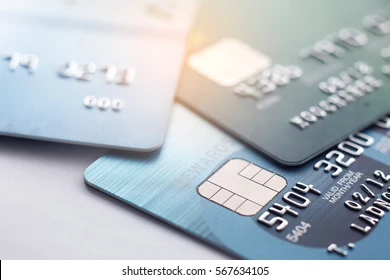

# 1) **Problem Statement** 

The Credit card transaction fraud detection  problem includes modeling past credit card transactions with the knowledge of ones that turned out to be a fraud. 
This model is then used to identify whether a new transaction is fraudulent or not .


# 2) **Problem Objective**

The aim of this project is to predict whether a credit card transaction is fraudulent or not ,  which is based on the transaction amount , location  and other transaction related all  the data.

# 3) **About the dataset**

*   Trans_date_trans_time - Transaction time stamp
*   cc_num - Credit card number
*   merchant - merchant name 
*   category - transaction category
*   amt - transaction amount
*   first - first name of card holder
*   Last - last name of card holder
*   gender - sex of card holder
*   street - transaction address
*   city -   transaction city
*   state - transaction state
*   zip - transaction zipcode
*   lat - transaction latitude
*   long - transaction longitude
*   city _pop - population of the city
*   job - job of the card holder
*   dob  - date of birth of card holder
*   trans_num - transaction number of transaction
*   unix _time - time in unix format
*   merch_lat - longitude of merchant 
*   is_fraud -  nature of transaction 
















**Note** :- is_fraud is target variable


 **Imports libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Exploration Steps for all the variables. Write down your findings after every variable exploration

## **Import the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Df = pd.read_csv("/content/drive/MyDrive/ML_Raw_File/CC Transactions Fraud Detection/fraudTest.csv")

# 4) **Data Exploration & Validation**

In [6]:
# To observe first  rows.
Df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


There are total 23 columns in the dataset that means we have 23 features in the dataset.

**Note** :- "is_fraud" is the target variable. 

## **Basic Details of the data**

In [ ]:
# To check number of unique values in each feature in the dataset.
Df.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [ ]:
# To get more information about datatypes in the dataset
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
# General information about the dataset.
Df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
#Are there any suspicious variables.(Duplicates)
Df.columns.values

array(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype=object)

**To get number of rows and columns in the dataset**

In [ ]:
# To get number of rows and columns that is dimensions.
Df.shape

(555719, 23)

In [ ]:
# To check null values in the dataset.
Df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# To check total null values in each feature.
Df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



```
# This is formatted as code
```

**Observations:-**

1)There are 23 variables(features) and 555719 observations

2)In the dataset there are no null values

3) Most of the variables are of object types in dataset , some are float type and some are of int type

In [ ]:
# Display the variable formats
Df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
Df['time'] = Df['unix_time'].apply(datetime.utcfromtimestamp)
Df.drop('unix_time', axis=1)

# Add cloumn hour of day
Df['hour_of_day'] = Df.time.dt.hour

In [ ]:
# Make two columns "time" & "hour_of_day" in place of "unix_time"
Df[['time','hour_of_day']]

,time,hour_of_day
0,2013-06-21 12:14:25,12
1,2013-06-21 12:14:33,12
2,2013-06-21 12:14:53,12
3,2013-06-21 12:15:15,12
4,2013-06-21 12:15:17,12
...,...,...
555714,2013-12-31 23:59:07,23
555715,2013-12-31 23:59:09,23
555716,2013-12-31 23:59:15,23
555717,2013-12-31 23:59:24,23


Converted unix_time feature in two diffrent features named as "time" & "hour_of_day".
After the conversion there no need to keep unix_time feature , better option is to drop that.

In [ ]:
Df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [ ]:
Df.columns.values

array(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'time', 'hour_of_day'], dtype=object)

In [ ]:
#What are the categorical and discrete variables? What are the continues variables.
Df.dtypes
Df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [ ]:
# Drop the column 'Unnamed: 0' as it is not involving role in model building.
Df.drop('Unnamed: 0',axis = 1,inplace=True)

**Converted 'trans_date_trans_time' column as individual columns called as 'trans_date' & 'trans_time'. after conversion drop trans_date_trans_time column.**

In [ ]:
Df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [ ]:
Df['trans_year'] = np.int64([d[6:10] for d in Df['trans_date_trans_time']])
Df['trans_month'] = np.int64([d[3:5] for d in Df['trans_date_trans_time']])
Df['trans_Date'] = np.int64([d[0:2] for d in Df['trans_date_trans_time']])

In [ ]:
Df['trans_time'] = pd.to_datetime(Df['trans_date_trans_time']).dt.time

In [ ]:
# As we split the the column "trans_date_trans_time" in four diffrent columns as "trans_date" ,"trans_month","trans_year" & "trans_time" so now drop the column "trans_date_trans_time".
Df.drop(['trans_date_trans_time'],axis = 1,inplace=True)

In [ ]:
# we cannot work on trans_num as there is no unique pattern, so good option will be an drop it
Df = Df.drop("trans_num",axis=1)

In [ ]:
Df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


In [ ]:
#Find the frequencies of all class variables in the data.
Df.columns.values

array(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time',
       'hour_of_day', 'trans_year', 'trans_month', 'trans_Date',
       'trans_time'], dtype=object)

# 5) **Categorical Variable Exploration**

#### 1) merchant

In [ ]:
Df['merchant'].value_counts()

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

#### 2) category

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64


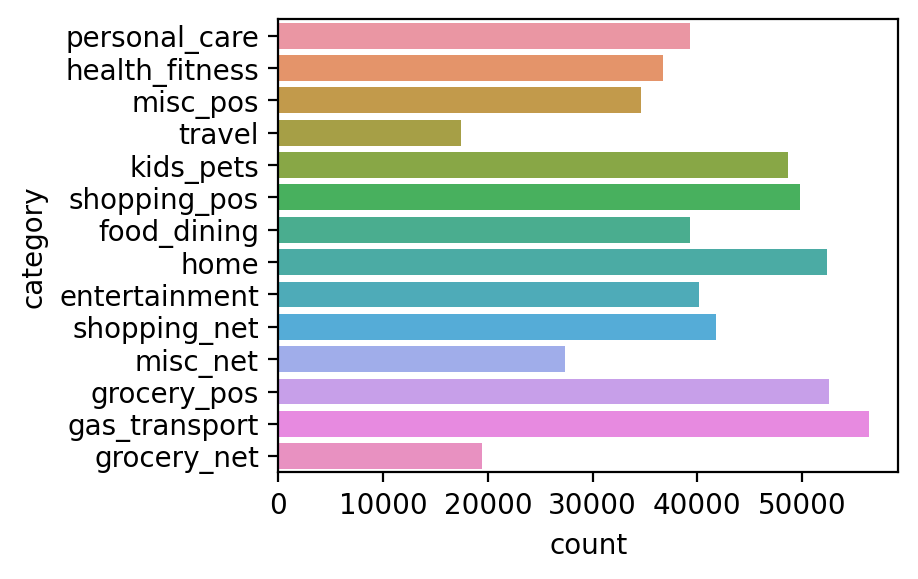

In [ ]:
# To count number of transactions in each category.
print(Df['category'].value_counts())
plt.figure(figsize=(4,3),dpi=200)
sns.countplot(y = "category" , data = Df)

**Most of the transactions are done in gas_transport**

#### 3) first

In [ ]:
# checking first and last name columns
Df['first'].value_counts()

Christopher    11443
Robert          9076
Jessica         8655
David           8599
Michael         8530
               ...  
Mike             199
Dennis            12
Evan              12
Bruce             10
Nicole             9
Name: first, Length: 341, dtype: int64

#### 4) last

In [ ]:
Df['last'].value_counts()

Smith        12146
Williams     10056
Davis         9524
Johnson       8556
Rodriguez     7485
             ...  
Santiago        12
Bates           12
Robbins         10
Freeman          8
Bartlett         7
Name: last, Length: 471, dtype: int64

In [ ]:
# we can see the first and last names of customers are not unique while the cc_num is, so we will use cc_num to distinct between customers
# and since first and last are now of no use of ours so we will drop them

Df = Df.drop(columns=["first","last"])

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


#### 5) state

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64


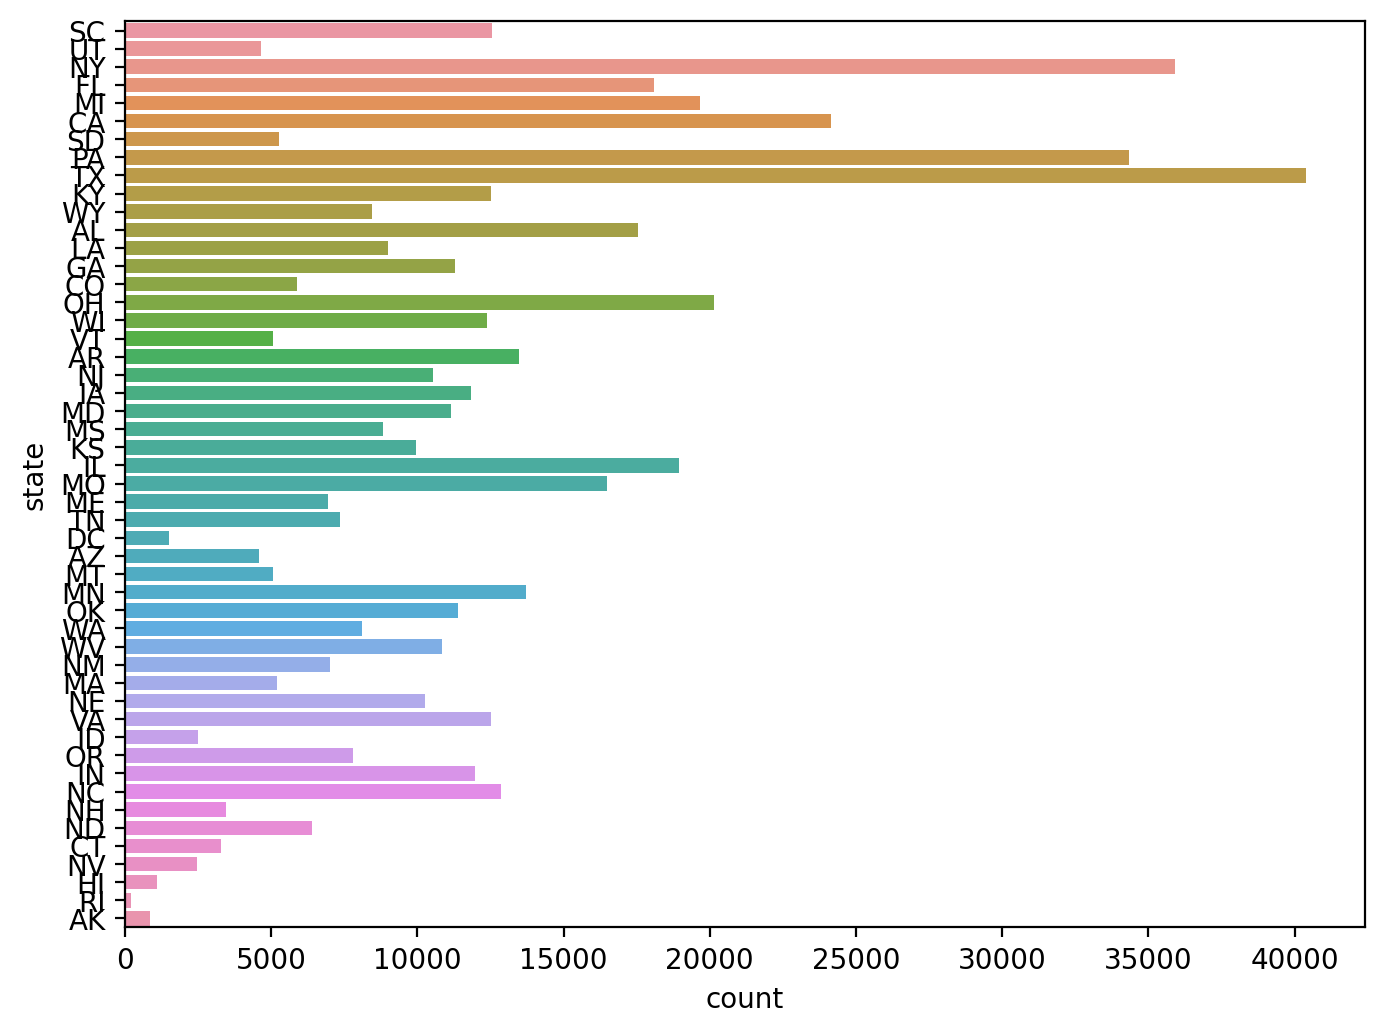

In [ ]:
print(Df['state'].value_counts())
plt.figure(figsize=(8,6),dpi=200) 
sns.countplot(y = "state" , data = Df)

#### 6) State

In [ ]:
Df['city'].value_counts()

Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
               ... 
Senatobia        10
Seattle           9
Guthrie           9
Rice              8
Wever             6
Name: city, Length: 849, dtype: int64

#### 7) zip

NOTE: As this variable is not useful in building the model, we will not use this variable for data building.

And hence variable exploration is not necessary.



#### 8) dob

In [ ]:
Df['dob'].value_counts()

23-03-1977    2408
15-09-1988    1951
29-08-1981    1935
22-09-1997    1474
05-07-1997    1466
              ... 
23-12-1936       9
08-11-1969       9
30-05-1944       8
09-05-1932       7
02-08-1998       6
Name: dob, Length: 910, dtype: int64

In [ ]:
# To predict customer frauds, 'dob' doesn't play any role that whether there will be a fraud with customer or not, so we can remove that column too. as it is not necessary.
# It is not useful in building the model , so it is better to drop this variable.

#Df = Df.drop("dob",1)


#### 8) gender

In [ ]:
# To check whether how many males and how many females are there.
Df['gender'].value_counts()

F    304886
M    250833
Name: gender, dtype: int64

**There are total 250833 males and 304886 females**

#### 9) job

In [ ]:
Df['job'].value_counts()

Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: job, Length: 478, dtype: int64

## 10) is_fraud

In [ ]:
Df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

**That means there are total 553574 transactions are normal and 2145 transactions are fraudelent**

In [ ]:
Df['gender']=Df['gender'].apply(lambda x: 1 if x=="M" else 0)
Df['gender'].value_counts()

0    304886
1    250833
Name: gender, dtype: int64

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


# 6) Continous Variable Explorration

In [ ]:
Df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'time', 'hour_of_day',
       'trans_year', 'trans_month', 'trans_Date', 'trans_time'],
      dtype='object')

sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so taking the 
**difference of longitude and lattitude of respective columns**

In [ ]:
Df["lat_diff"] = abs(Df.lat - Df.merch_lat)
Df["long_diff"] = abs(Df["long"] - Df["merch_long"])

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,lat_diff,long_diff
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,0.020491,0.265214
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,0.870202,0.475569
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,0.177090,0.659611
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,0.242698,0.063961
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,0.706248,0.867734


In [ ]:
# So ,now  we have the difference i.e. lat_diff & long_diff ,As we know that difference between each degree of longitude and lattitude is 69 miles(approx) i.e 110 Kilometers.
# So taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem

Df["displacement"] = np.sqrt(pow((Df["lat_diff"]*110),2) + pow((Df["long_diff"]*110),2))

# here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and lattitude is 69 miles(approx).

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,lat_diff,long_diff,displacement
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,0.020491,0.265214,29.260485
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,0.870202,0.475569,109.084144
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,0.177090,0.659611,75.126661
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,0.242698,0.063961,27.608319
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,0.706248,0.867734,123.069725


In [ ]:
# now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
Df = Df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555719 non-null  float64       
 1   merchant      555719 non-null  object        
 2   category      555719 non-null  object        
 3   amt           555719 non-null  float64       
 4   gender        555719 non-null  int64         
 5   street        555719 non-null  object        
 6   city          555719 non-null  object        
 7   state         555719 non-null  object        
 8   zip           555719 non-null  int64         
 9   city_pop      555719 non-null  int64         
 10  job           555719 non-null  object        
 11  dob           555719 non-null  object        
 12  unix_time     555719 non-null  int64         
 13  is_fraud      555719 non-null  int64         
 14  time          555719 non-null  datetime64[ns]
 15  hour_of_day   555

In [ ]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
# we can work with cities through their population parameter, as names of cities cannot implement whether a fraud will be done or not, while
# population of a city can.
Df = Df.drop(columns = ["city","zip","street"])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555719 non-null  float64       
 1   merchant      555719 non-null  object        
 2   category      555719 non-null  object        
 3   amt           555719 non-null  float64       
 4   gender        555719 non-null  int64         
 5   state         555719 non-null  object        
 6   city_pop      555719 non-null  int64         
 7   job           555719 non-null  object        
 8   dob           555719 non-null  object        
 9   unix_time     555719 non-null  int64         
 10  is_fraud      555719 non-null  int64         
 11  time          555719 non-null  datetime64[ns]
 12  hour_of_day   555719 non-null  int64         
 13  trans_year    555719 non-null  int64         
 14  trans_month   555719 non-null  int64         
 15  trans_Date    555

#### 1) **amt**

In [ ]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [ ]:
util_percentiles=Df['amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100        4.08
0.250        9.63
0.500       47.29
0.750       83.01
0.800       94.40
0.900      135.55
0.910      142.38
0.920      150.93
0.930      162.74
0.940      177.45
0.950      193.05
0.960      210.08
0.970      238.74
0.980      320.49
0.990      519.85
0.995      787.16
1.000    22768.11
Name: amt, dtype: float64

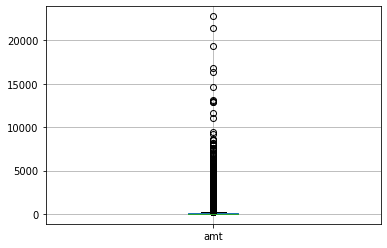

In [ ]:
Df.boxplot(column='amt')

There are lot of outliers. need to be clean

In [ ]:
Df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

0- Normal Transactions 


1- Normal Transaction

In [ ]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [ ]:
Percentiles = Df['amt'].quantile([0.10,0.25,0.5,0.75,0.80,0.90,0.91,0.92,0.93,0.94,0.96,0.97,0.98,0.99,1.0])
Percentiles

0.10        4.0800
0.25        9.6300
0.50       47.2900
0.75       83.0100
0.80       94.4000
0.90      135.5500
0.91      142.3800
0.92      150.9300
0.93      162.7374
0.94      177.4500
0.96      210.0800
0.97      238.7400
0.98      320.4864
0.99      519.8546
1.00    22768.1100
Name: amt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d191d3890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d191d9350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d191d32d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d191d9e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d191e0390>],
 'means': []}

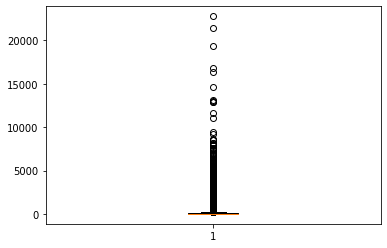

In [ ]:
plt.boxplot(Df["amt"])

**We can see that fraud transactions are very very less as compare to the normal ones.**

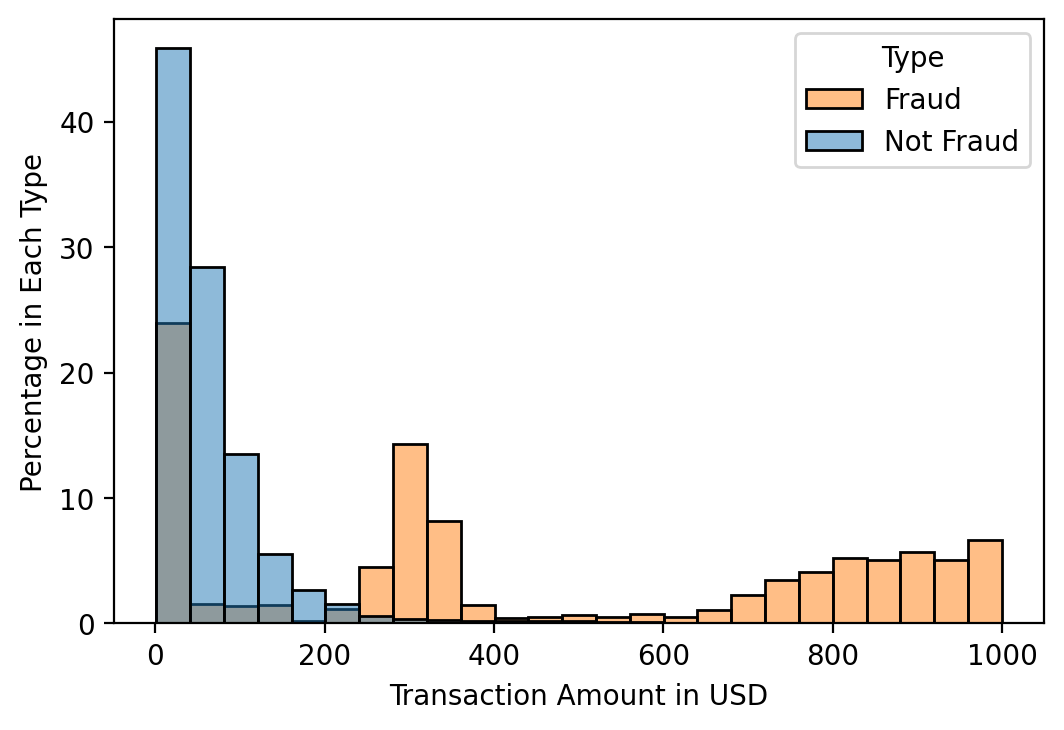

In [ ]:
#amount vs fraud
plt.figure(figsize=(6,4),dpi=200)
ax=sns.histplot(x='amt',data=Df[Df.amt<=1000],hue='is_fraud',stat='percent',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**Observation** :-The result is very interesting! While normal transactions tend to be around    \$200  or less, we can see fraudulent transactions peak around \$300 and then at the $800-\$1000 range.

Text(0, 0.5, 'Number of transactions')

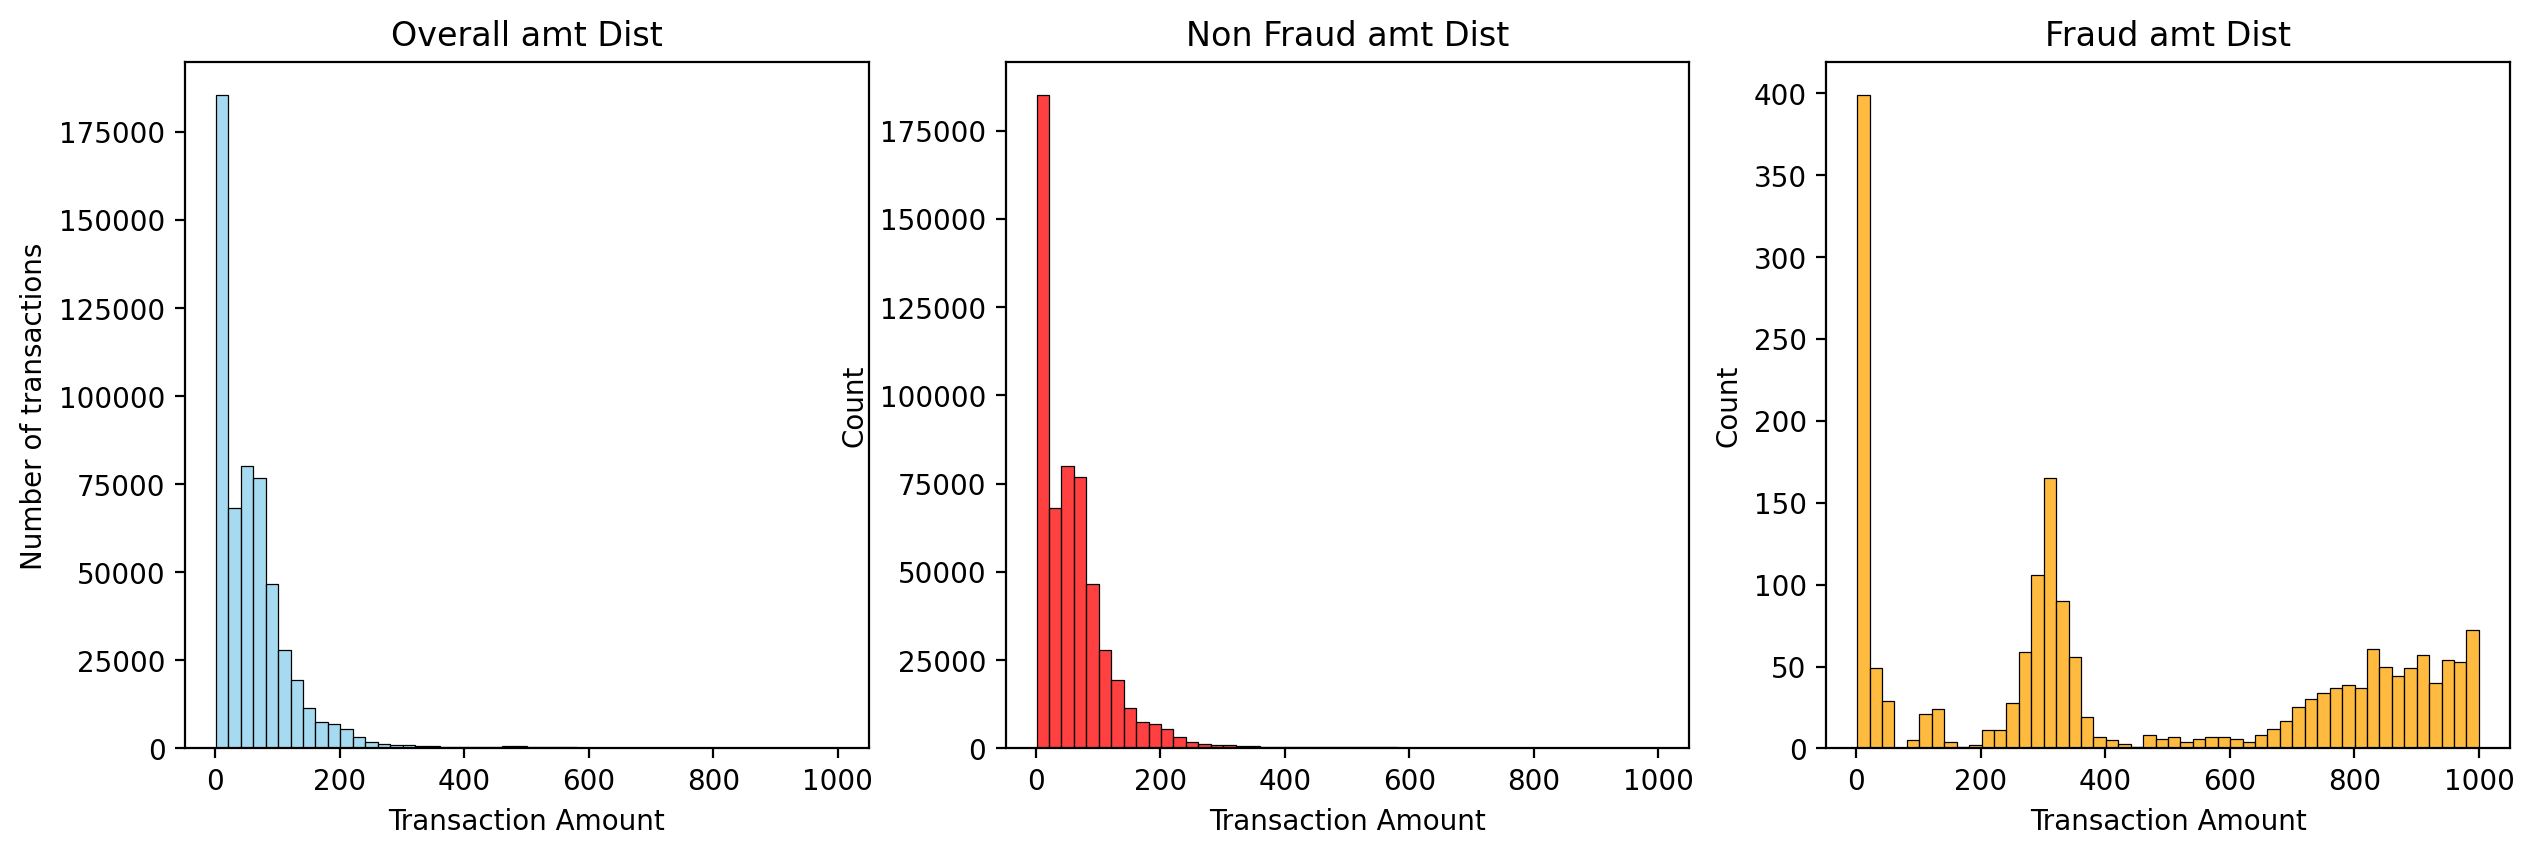

In [ ]:
fig = plt.subplots(figsize=(15,10),dpi=200)
plots = []

plots.append(sns.histplot(Df[Df.amt <= 1000].amt, bins=50, ax=plt.subplot(234),color='skyblue'))
plots.append(sns.histplot(Df[(Df.is_fraud==0) & (Df.amt<=1000)].amt, bins=50, ax=plt.subplot(235),color='red'))
plots.append(sns.histplot(Df[(Df.is_fraud==1) & (Df.amt<=1000)].amt, bins=50, ax=plt.subplot(236),color='orange'))

#setting titles
plots[0].set_title('Overall amt Dist')
plots[1].set_title('Non Fraud amt Dist')
plots[2].set_title('Fraud amt Dist')

#setting x labels
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')

#setting y label
plots[0].set_ylabel('Number of transactions')

**Create new column as age**

In [ ]:
import datetime as dt
Df['age']=dt.date.today().year-pd.to_datetime(Df['dob']).dt.year

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,dob,unix_time,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,displacement,age
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,SC,333497,Mechanical engineer,19-03-1968,1371816865,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,29.260485,54
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,UT,302,"Sales professional, IT",17-01-1990,1371816873,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,109.084144,32
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,NY,34496,"Librarian, public",21-10-1970,1371816893,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,75.126661,52
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,FL,54767,Set designer,25-07-1987,1371816915,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,27.608319,35
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,MI,1126,Furniture designer,06-07-1955,1371816917,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,123.069725,67


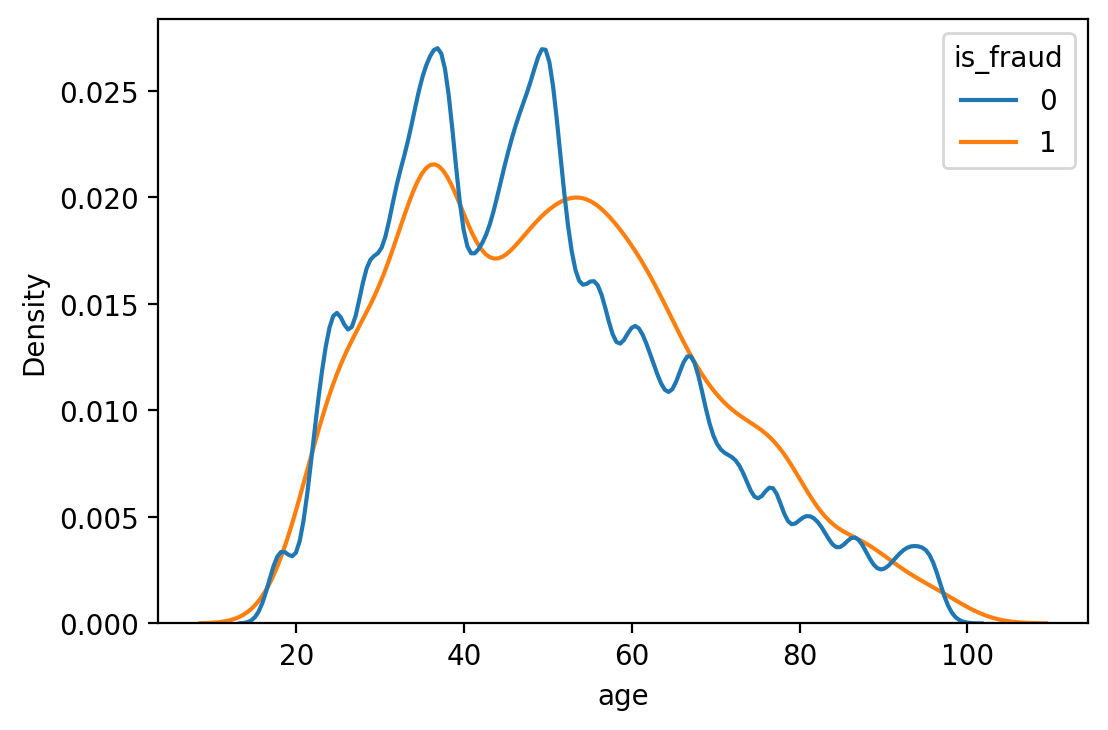

In [ ]:
plt.figure(figsize=(6,4),dpi=200)
sns.kdeplot(data=Df,x='age',hue='is_fraud',common_norm=False)

**Observation** :- From the graph we can see that most of the fraud transactions are done by 30-60 age group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


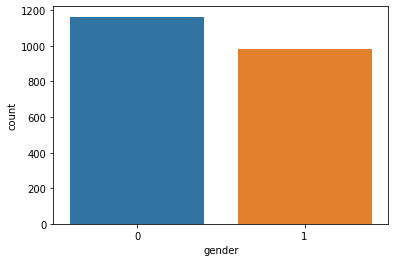

In [ ]:
# number of fraud transactions per gender.
sns.countplot(Df[Df["is_fraud"]==1]["gender"])

**Observation** :- There are more Fraud transactions are done by females.nearly about 1200 fraud transactions are done by females and around 1000 fraud transactions are done by males. 

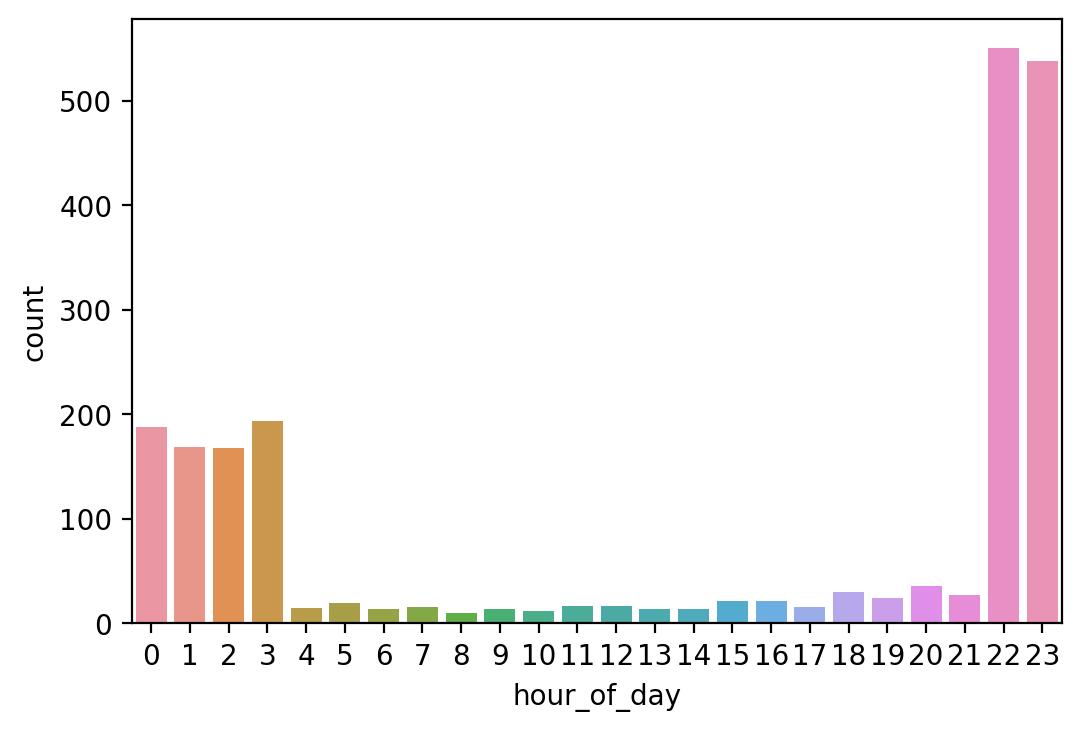

In [ ]:
#Plotting fraud transactions with respect to the hour of day
plt.figure(figsize=(6,4),dpi=200)
sns.countplot(x="hour_of_day",data=Df[Df["is_fraud"]==1])

**Observation** :- From the Graph we can see that mostly fraud transactions are done in midnight around 22 hour to 24 hour of the day.In daytime fraud transactions are very less in number.

From this we can conclude that most of the fraud transactions happened during midnight.

In [ ]:
#Creating a dataframe consisting of state wise fraud transactions
df1 = Df.groupby(by="state").sum()["is_fraud"].to_frame()
df1.reset_index(inplace=True)
df1 = df1.rename(columns = {"state":"State","is_fraud":"Fraudulent Transactions"})
df1.head()

,State,Fraudulent Transactions
0,AK,14
1,AL,63
2,AR,34
3,AZ,27
4,CA,76


# 7) Data Cleaning and Data Preparation

Write down Outlier treatment and missing value treatment code

In [ ]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1d20577410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1d2051c050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1d20524210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1d2095a110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1d2095a690>],
 'means': []}

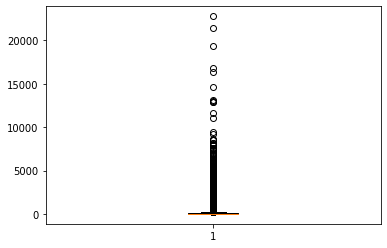

In [ ]:
plt.boxplot(Df['amt'])

**Observation:-**  From the boxplot we can see that there are lot of outliers in the "amt". need to treat them 

In [ ]:
util_percentiles=Df['amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100        4.08
0.250        9.63
0.500       47.29
0.750       83.01
0.800       94.40
0.900      135.55
0.910      142.38
0.920      150.93
0.930      162.74
0.940      177.45
0.950      193.05
0.960      210.08
0.970      238.74
0.980      320.49
0.990      519.85
0.995      787.16
1.000    22768.11
Name: amt, dtype: float64

**Observation:-**From the quantile function we are able to understand that most of the data is clean around 99.5% of the data. 99.5% of the data is below 787.16$

In [ ]:
(Df['amt']>1000).sum()

1583

In [ ]:
(Df['amt']<1000).sum()

554136

**Observation:-**If we see that most of the data that is 554136 entries are below 1000$ and only 1583 is above 1000 so we can treat them as outliers. 1583 is less than 10% of the data . So , We can change them with median. 

In [ ]:
Df['amt'].median()

47.29

In [ ]:
Df['amt1']=Df['amt']
Df['amt1'][Df['amt']>1000]=Df['amt'].median()
round(Df['amt1'].describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    555719.0
mean         64.0
std          85.0
min           1.0
25%          10.0
50%          47.0
75%          82.0
max        1000.0
Name: amt1, dtype: float64

In [ ]:
util_percentiles=Df['amt1'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100      4.08
0.250      9.63
0.500     47.29
0.750     82.46
0.800     93.67
0.900    133.89
0.910    140.25
0.920    148.24
0.930    158.96
0.940    173.24
0.950    188.66
0.960    204.81
0.970    227.71
0.980    289.91
0.990    461.31
0.995    584.89
1.000    999.69
Name: amt1, dtype: float64

# 8) Model Building & Feature Engineering


In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555719 non-null  float64       
 1   merchant      555719 non-null  object        
 2   category      555719 non-null  object        
 3   amt           555719 non-null  float64       
 4   gender        555719 non-null  int64         
 5   state         555719 non-null  object        
 6   city_pop      555719 non-null  int64         
 7   job           555719 non-null  object        
 8   dob           555719 non-null  object        
 9   unix_time     555719 non-null  int64         
 10  is_fraud      555719 non-null  int64         
 11  time          555719 non-null  datetime64[ns]
 12  hour_of_day   555719 non-null  int64         
 13  trans_year    555719 non-null  int64         
 14  trans_month   555719 non-null  int64         
 15  trans_Date    555

In [ ]:
Df.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,dob,unix_time,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,displacement,age,amt1
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,SC,333497,Mechanical engineer,19-03-1968,1371816865,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,29.260485,54,2.86
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,UT,302,"Sales professional, IT",17-01-1990,1371816873,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,109.084144,32,29.84
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,NY,34496,"Librarian, public",21-10-1970,1371816893,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,75.126661,52,41.28
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,FL,54767,Set designer,25-07-1987,1371816915,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,27.608319,35,60.05
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,MI,1126,Furniture designer,06-07-1955,1371816917,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,123.069725,67,3.19


**Observation:-**

1) Linear Regreesion is not a suitable choice for the given data. 

2) As we know that for a given dataset output is classification it is not continouse so we should use Logistic Regression here to get the good accuracy.

## **1)Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic= LogisticRegression()
results = logistic.fit(Df[["amt1"]+['displacement']+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logistic.intercept_

array([-1.61983637e-06])

In [ ]:
logistic.coef_

array([[ 7.22309416e-03, -1.28149625e-04,  7.80006139e-06,
        -4.62252261e-07, -5.99300503e-07, -2.36418463e-05,
        -5.57739845e-05, -3.27206943e-03, -3.78016961e-05]])

#### Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Since we need to find accuracy of the model , we will have to find confusion matrix.
 
True Positive (TN) = [1,1]
True Negative (TN) = [0,0]
False Negative (FN) = [1,0]
False Positive (FP) = [0,1]


In [ ]:
predict1=logistic.predict(Df[["amt1"]+['displacement']+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']])
predict1

cm1 = confusion_matrix(Df[['is_fraud']],predict1)
print(cm1)

[[553391    183]
 [  1930    215]]


In [ ]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [555321    398]
Total 555719


In [ ]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.9961977186311787

**Observations:-**By Looking at the accuracy of the logistic regression we can conclude that model is overfitted.

In [ ]:
Df['is_fraud']

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

#### Individual Impact of Variable

In [ ]:
import statsmodels.api as sm
m1=sm.Logit(Df['is_fraud'],Df[["amt1"]+["displacement"]+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555710
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2601
Time:                        13:06:45   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------


**Observations:-** We can see that "displacement" & "gender" are non impactful variables , by looking at their P value

Now We will build a Logistic regression model such that it includes only impactful variables.

In [ ]:
m2=sm.Logit(Df['is_fraud'],Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555712
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2601
Time:                        13:06:51   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
am

**Observations:-**Now see that all variables are impactful in the model.

In [ ]:
logistic2= LogisticRegression()
results = logistic2.fit(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predict1=logistic2.predict(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']])
predict1

cm1 = confusion_matrix(Df[['is_fraud']],predict1)
print(cm1)

[[553391    183]
 [  1929    216]]


## **2)Decision Tree Model**

In [ ]:
from sklearn import tree

features= ["amt1",'displacement','hour_of_day','city_pop','gender','trans_Date','trans_month','trans_year','age']
print("Features",features)

X = Df[features]
print("X shape", X.shape)
y = Df['is_fraud']
print("Y shape", y.shape)

Features ['amt1', 'displacement', 'hour_of_day', 'city_pop', 'gender', 'trans_Date', 'trans_month', 'trans_year', 'age']
X shape (555719, 9)
Y shape (555719,)


|--- amt1 <= 710.11
|   |--- amt1 <= 269.01
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  21.50
|   |   |   |--- class: 0
|   |--- amt1 >  269.01
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|--- amt1 >  710.11
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- age <= 51.50
|   |   |   |--- class: 1
|   |   |--- age >  51.50
|   |   |   |--- class: 1



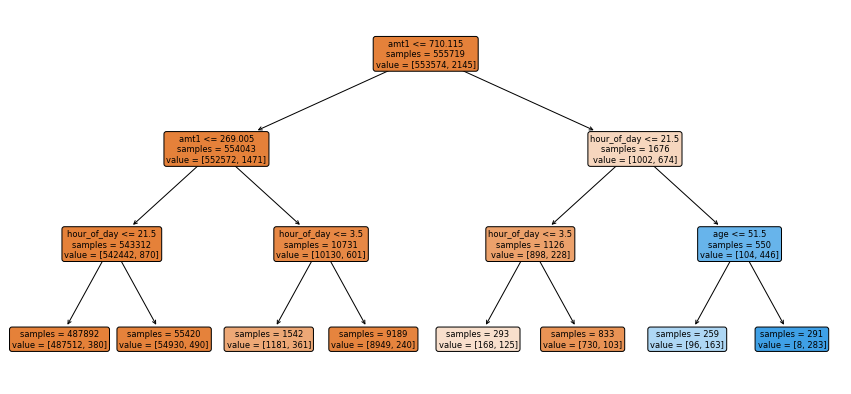

In [ ]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

#### Model Validation

In [ ]:
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
# Calculate Accouracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[553470    104]
 [  1699    446]]
0.9967555545158614


**This is a overfitting problem**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[442867      0]
 [     0   1708]]
Train Accuracy 1.0
[[110441    266]
 [   202    235]]
Test Accuracy 0.9957892463830706


#### **Pruning**

In [ ]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
print(cm1)
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[442757    110]
 [  1168    540]]
Train Accuracy 0.9971253444300736
[[110681     26]
 [   288    149]]
Test Accuracy 0.9971748362484705


|--- amt1 <= 710.11
|   |--- amt1 <= 269.01
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- hour_of_day <= 3.50
|   |   |   |   |--- amt1 <= 23.70
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  23.70
|   |   |   |   |   |--- class: 0
|   |   |   |--- hour_of_day >  3.50
|   |   |   |   |--- amt1 <= 229.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  229.82
|   |   |   |   |   |--- class: 0
|   |   |--- hour_of_day >  21.50
|   |   |   |--- amt1 <= 249.23
|   |   |   |   |--- amt1 <= 16.31
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  16.31
|   |   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  249.23
|   |   |   |   |--- amt1 <= 249.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amt1 >  249.43
|   |   |   |   |   |--- class: 0
|   |--- amt1 >  269.01
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 355.14
|   |   |   |   |--- age <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  28.50
|  

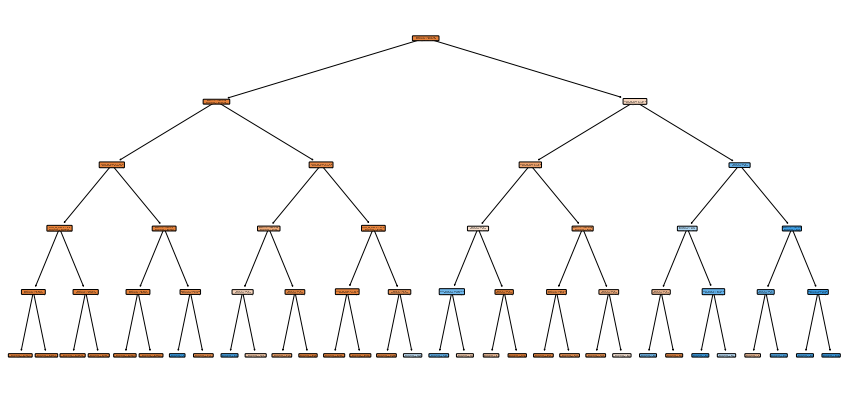

In [ ]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

# 9) **Sensitivity & Specificity**

**Sensitivity:-** The percentage of positives that are successfully classified as positive. 

**Sensitivity = (True Positives)/(True Positives + False Negatives)**

**Specificity:-** Percentage of negatives that are successfully classified as negative.





**Specificity=(True Negatives)/(True Negatives + False Positives)** 


In [ ]:
import statsmodels.formula.api as sm

In [ ]:
model = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+trans_year+age', data=Df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555711
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2601
Time:                        13:07:13   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.332e-06        nan        nan        nan         nan         nan
amt1            0.0072   

In [ ]:
model = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+age', data=Df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555712
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2601
Time:                        13:07:18   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.0778      0.155    -39.186      0.000      -6.382      -5.774
amt1            0.0072   

**Observations:-**Now we can see that all the avriables in the logistic model are impactful , by checking their P value. 

In [ ]:
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.00154759 0.00175997 0.00227174 0.00219654 0.00201884 0.00161935
 0.00534387 0.0018125  0.0017175  0.00315002]


555719

In [ ]:
#Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now , Find overall model accuracy , sensitivity and specificity

In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[553404    170]
 [  1874    271]]
Accuracy :  0.9963218821022856
Sensitivity :  0.9996929046523139
Specificity :  0.12634032634032635


**Observations:-**Sensitivity is very high but as specificity is very less  that means accuracy of identifying fraud transactions by the model is very less . To improve Specificity adjust the threshold value.

In [ ]:
#Sensitivity vs Specificity with Different Thresholds
#Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[552714    860]
 [  1503    642]]
Accuracy :  0.9957478509822411
Sensitivity :  0.9984464588293526
Specificity :  0.2993006993006993


**Observation:-**By adjusting threshold=0.2 we are geeting specificity value is 0.3048 that means some improvement is there.

# 10) **Precision, Recall & F1 Score**

In [ ]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Confusion Matrix : 
 [[552714    860]
 [  1503    642]]
Accuracy :  0.9957478509822411
Precision_Class0 :  0.9972880658658972
Recall_Class0 :  0.9984464588293526
F1_Class0 :  0.9978669261620647
Precision_Class1 :  0.4274300932090546
Recall_Class1 :  0.2993006993006993
F1_Class1 :  0.3520701946805594


We can simulate all these thing by inbuilt function in sklearn.metrics  that is classification_report

In [ ]:
# By direct package
from sklearn.metrics import classification_report
print(classification_report(Df["is_fraud"],predicted_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.43      0.30      0.35      2145

    accuracy                           1.00    555719
   macro avg       0.71      0.65      0.67    555719
weighted avg       1.00      1.00      1.00    555719



# 11) **Handling Class Imbalance**

In [ ]:
print("Actual Data :", Df.shape)

#Frequency count on target column
freq=Df['is_fraud'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_card_normal_class0 = Df[Df['is_fraud'] == 0]
credit_card_fraud_class1 = Df[Df['is_fraud'] == 1]

print("Class0 Actual :", credit_card_normal_class0.shape)
print("Class1 Actual  :", credit_card_fraud_class1.shape)


Actual Data : (555719, 20)
0    553574
1      2145
Name: is_fraud, dtype: int64
0    99.614014
1     0.385986
Name: is_fraud, dtype: float64
Class0 Actual : (553574, 20)
Class1 Actual  : (2145, 20)


**Observations:-** We can see that this data is very imbalanced , means proportion of normal transactions is very high as compare to fraud transactions.

**Observations:-** Only about 0.38 percent data is for fraud transactions. which is very less. Thats why need to oversampling.

####  **Undersampling & Oversampling**

In [ ]:
#Undersampling of class-0
# Consider 0.85 percent of class-0
credit_card_normal_class0_under = credit_card_normal_class0.sample(int(0.85*len(credit_card_normal_class0)))
print("Class0 Undersample :", credit_card_normal_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by fourty times
credit_card_fraud_class1_over = credit_card_fraud_class1.sample(40*len(credit_card_fraud_class1),replace=True)
print("Class1 Oversample :", credit_card_fraud_class1_over.shape)

#Concatenate to create the final balanced data
credit_card_balanced=pd.concat([credit_card_normal_class0_under,credit_card_fraud_class1_over])
print("Final Balannced Data :", credit_card_balanced.shape)

#Frequency count on target column in the balanced data
freq=credit_card_balanced['is_fraud'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (470537, 20)
Class1 Oversample : (85800, 20)
Final Balannced Data : (556337, 20)
0    470537
1     85800
Name: is_fraud, dtype: int64
0    84.577693
1    15.422307
Name: is_fraud, dtype: float64


**Note:-** Here ,I have oversampled fraud transactions data is about 15% and undersampled the normal transaction data is about 85% of the total

In [ ]:
Df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'city_pop',
       'job', 'dob', 'unix_time', 'is_fraud', 'time', 'hour_of_day',
       'trans_year', 'trans_month', 'trans_Date', 'trans_time', 'displacement',
       'age', 'amt1'],
      dtype='object')

## 1)Logistic Regression 

In [ ]:
logistic_new= LogisticRegression()
new_results = logistic_new.fit(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predict3=logistic_new.predict(credit_card_balanced[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['age']])
predict3

cm3 = confusion_matrix(credit_card_balanced[['is_fraud']],predict3)
print(cm3)

[[470323    214]
 [ 78460   7340]]


In [ ]:
total1=sum(sum(cm3))
#from confusion matrix calculate accuracy
accuracy3=(cm3[0,0]+cm3[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9957478509822411
Sensitivity :  0.9984464588293526
Specificity :  0.2993006993006993


**Observations:-** After oversampling and undersampling specificity in increased upto certain limit

In [ ]:
import statsmodels.formula.api as sm
model_new_data = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+age', data=credit_card_balanced)
result_new = model_new_data.fit()
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.288538
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               556337
Model:                          Logit   Df Residuals:                   556330
Method:                           MLE   Df Model:                            6
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.3289
Time:                        13:07:34   Log-Likelihood:            -1.6052e+05
converged:                       True   LL-Null:                   -2.3921e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9137      0.031    -62.098      0.000      -1.974      -1.853
amt1            0.0079   3

In [ ]:
predictions = result_new.predict()
print(predictions[0:10])
len(predictions)

[0.10628329 0.09406729 0.05150215 0.05879809 0.08549039 0.07768999
 0.07392418 0.0664233  0.07252032 0.0478647 ]


556337

In [ ]:
### Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(credit_card_balanced["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[464585   5952]
 [ 51759  34041]]
Accuracy :  0.8962661120867388
Sensitivity :  0.9873506227990573
Specificity :  0.39674825174825173


##### Updated Sensitivity & Specificity

In [ ]:
#Sensitivity vs Specificity with Different Thresholds
# Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]


#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(credit_card_balanced["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[447556  22981]
 [ 32816  52984]]
Accuracy :  0.8997064728752536
Sensitivity :  0.9511600575512659
Specificity :  0.6175291375291375


#### Updated Precision, Recall and F1-Score

In [ ]:
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Accuracy :  0.8997064728752536
Precision_Class0 :  0.9316862764690698
Recall_Class0 :  0.9511600575512659
F1_Class0 :  0.9413224609294895
Precision_Class1 :  0.6974791022181268
Recall_Class1 :  0.6175291375291375
F1_Class1 :  0.6550737180477854


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(credit_card_balanced["is_fraud"],predicted_class1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    470537
           1       0.70      0.62      0.66     85800

    accuracy                           0.90    556337
   macro avg       0.81      0.78      0.80    556337
weighted avg       0.90      0.90      0.90    556337



**Observations:-** We can observe that after handeling the imbalanced data , we getting accuracy for the class 2(Fraud transactions) .i.e. specificity is 0.62 . But before it was to less.

## 2)Decision Tree

In [ ]:
from sklearn import tree

features1= ["amt1",'displacement','hour_of_day','city_pop','gender','trans_Date','trans_month','trans_year','age']
print("Features",features)

X = credit_card_balanced[features1]
print("X shape", X.shape)
y = credit_card_balanced['is_fraud']
print("Y shape", y.shape)

Features ['amt1', 'displacement', 'hour_of_day', 'city_pop', 'gender', 'trans_Date', 'trans_month', 'trans_year', 'age']
X shape (556337, 9)
Y shape (556337,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- amt1 <= 16.31
|   |   |   |--- class: 0
|   |   |--- amt1 >  16.31
|   |   |   |--- class: 0
|--- amt1 >  251.35
|   |--- amt1 <= 682.24
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 1
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 1
|   |--- amt1 >  682.24
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- class: 1
|   |   |--- hour_of_day >  21.50
|   |   |   |--- class: 1



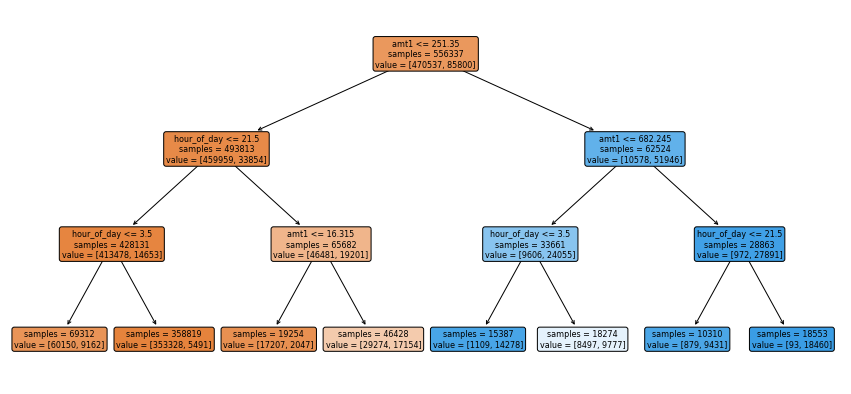

In [ ]:
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [ ]:
#Tree Validation
predict2 = DTree.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predict2)
print (cm)

total = sum(sum(cm))
# Calculate Accouracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[459959  10578]
 [ 33854  51946]]
0.9201347384768584


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[376320      0]
 [     0  68749]]
Train Accuracy 1.0
[[93977   240]
 [    0 17051]]
Test Accuracy 0.9978430456195851


#### **Pruning**

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
print(cm1)
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[367514   8806]
 [ 15338  53411]]
Train Accuracy 0.9457522316764367
[[91866  2351]
 [ 3744 13307]]
Test Accuracy 0.9452223460473811


**Note :-** Adjust the pruning parameters till we get the train accuracy nearly equal to the test accuracy. That will be fix the size of the decision tree. 

**Note:-** There are two prunning parameters 1) **max_depth** & 2) **max_leaf_nodes**

**Observations:-** In this case if we take **max_depth = 5** that will give train and test accuracy nearly same.

|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 23.70
|   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  23.70
|   |   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- amt1 <= 229.82
|   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  229.82
|   |   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- amt1 <= 16.31
|   |   |   |--- amt1 <= 6.66
|   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  6.66
|   |   |   |   |--- class: 0
|   |   |--- amt1 >  16.31
|   |   |   |--- amt1 <= 47.43
|   |   |   |   |--- class: 1
|   |   |   |--- amt1 >  47.43
|   |   |   |   |--- class: 0
|--- amt1 >  251.35
|   |--- amt1 <= 682.24
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 382.21
|   |   |   |   |--- class: 1
|   |   |   |--- amt1 >  382.21
|   |   |   |   |--- class: 1
|   |   |--- hour_of_day >  3.50
|   |   |   |--- hour_of_day <= 21.50
|   |   |   |   |--- class: 0
|   |   | 

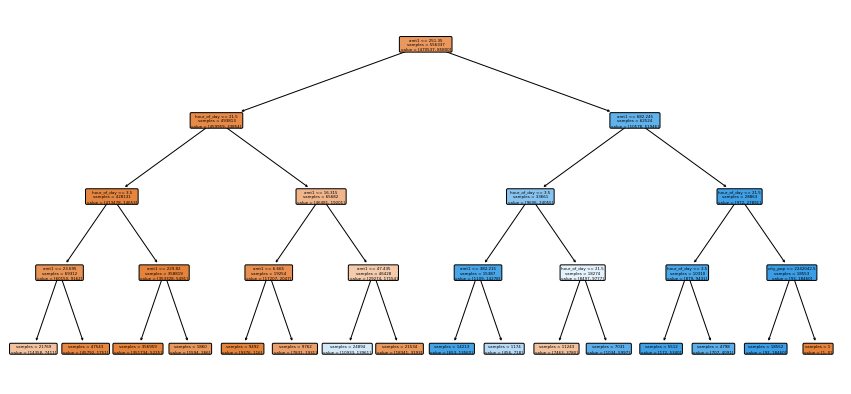

In [ ]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=4)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

**ROC(Receiver operating characteristics)**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = credit_card_balanced["is_fraud"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0.         0.         0.         ... 0.99625322 0.99625322 1.        ]
true_positive_rate [0.00000000e+00 3.49650350e-04 6.64335664e-04 ... 9.99545455e-01
 1.00000000e+00 1.00000000e+00]
thresholds [1.99668937 0.99668937 0.99627996 ... 0.02014041 0.02012933 0.00704844]


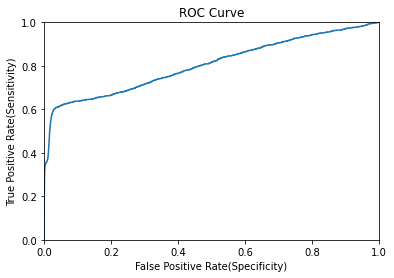

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate) 
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

**AUC**

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8040168407892518

**Observations:-** We are getting AUC is 0.80 , but for the good model AUC is should be near to 1.